In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from plotly.subplots import make_subplots
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [51]:
DatosExcel = pd.read_csv('./Titanic-Dataset.csv')

In [52]:
DatosExcel.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
# (1). Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
DatosExcel.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
print(DatosExcel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


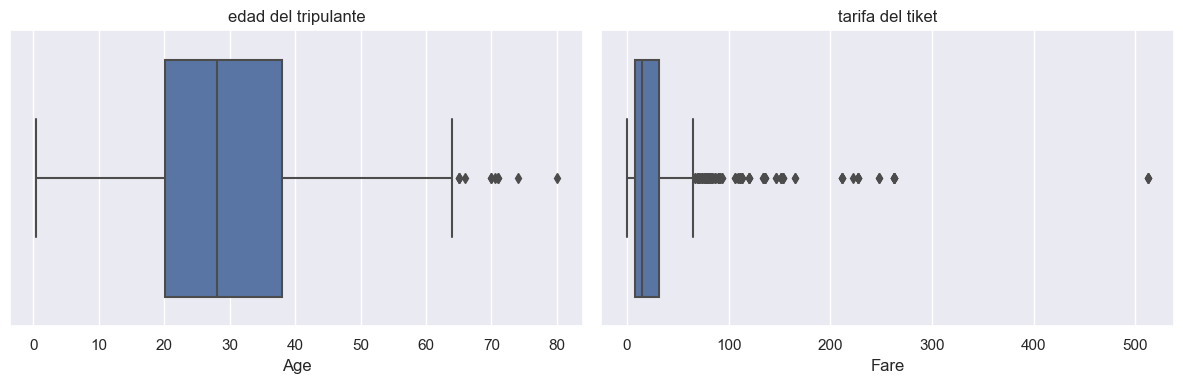

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Boxplot para 'year' en el primer eje
sns.boxplot(x=DatosExcel['Age'], ax=axes[0])
axes[0].set_title('edad del tripulante')

# Boxplot para 'selling_price' en el segundo eje
sns.boxplot(x=DatosExcel['Fare'], ax=axes[1])
axes[1].set_title('tarifa del tiket')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [55]:
DatosExcel.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# (2). Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
# Verificar valores faltantes por columna
DatosExcel['Age'].fillna(DatosExcel['Age'].median(), inplace=True)

# Rellenar los valores faltantes de Embarked con la moda
DatosExcel['Embarked'].fillna(DatosExcel['Embarked'].mode()[0], inplace=True)

# Eliminar la columna Cabin debido a la gran cantidad de valores faltantes
DatosExcel.drop(columns=['Cabin'], inplace=True)

# Opcionalmente, puedes crear una nueva característica que indique si un pasajero tenía un número de cabina
# DatosExcel['HasCabin'] = DatosExcel['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Verificar nuevamente los valores faltantes después de la limpieza
print(DatosExcel.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [57]:
DatosExcel.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


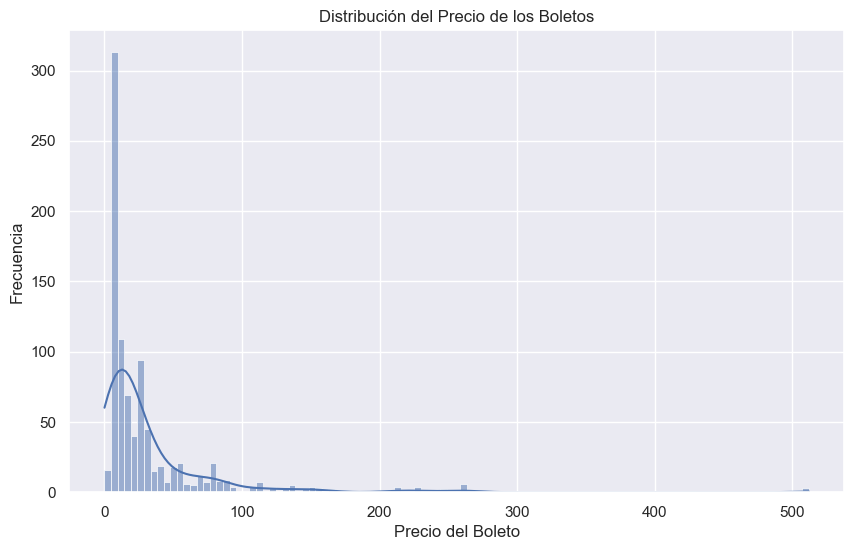

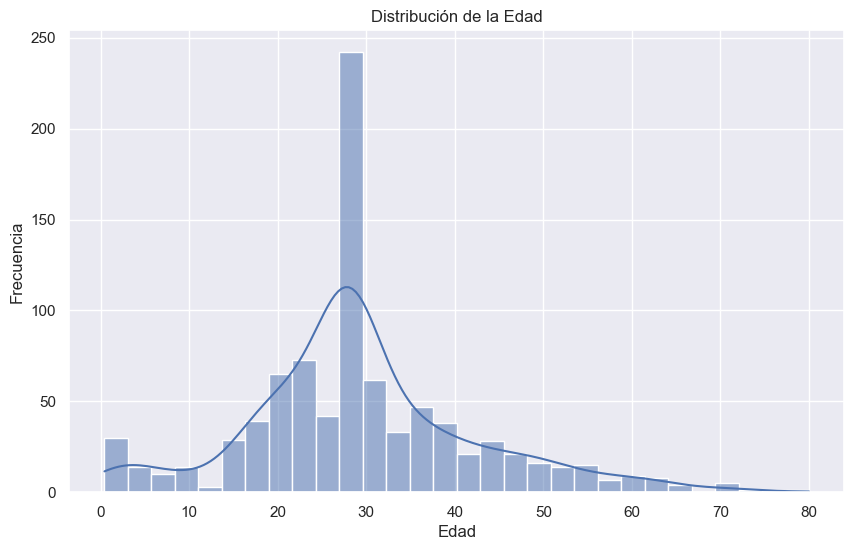

In [58]:
# Visualizar la distribución de precios de venta usando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(DatosExcel['Fare'], kde=True)
plt.title('Distribución del Precio de los Boletos')
plt.xlabel('Precio del Boleto')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de la edad usando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(DatosExcel['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


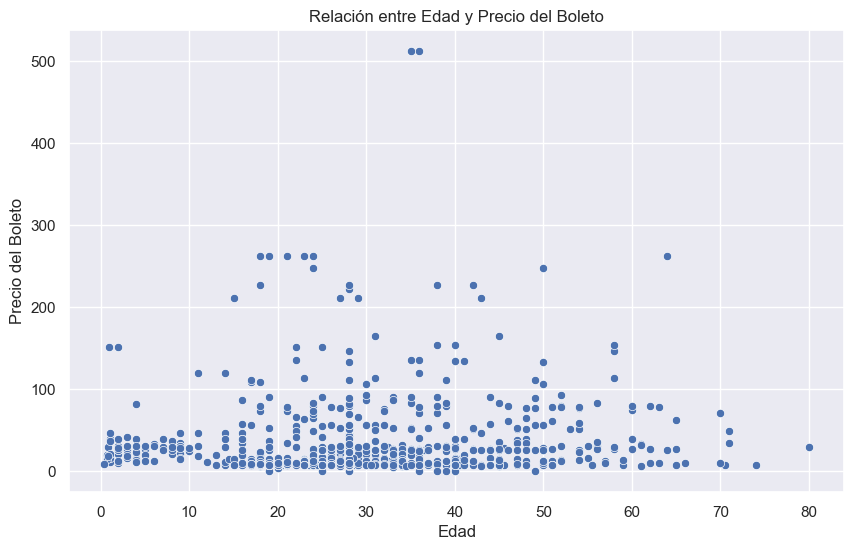

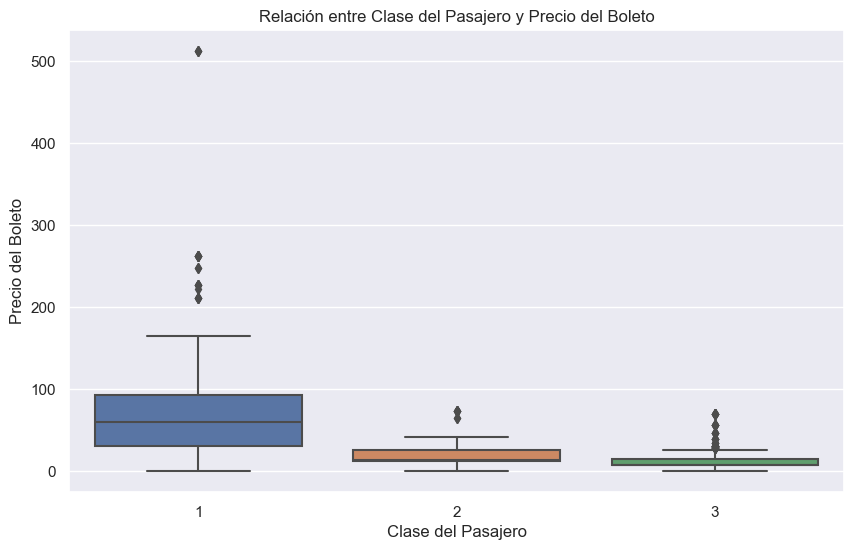

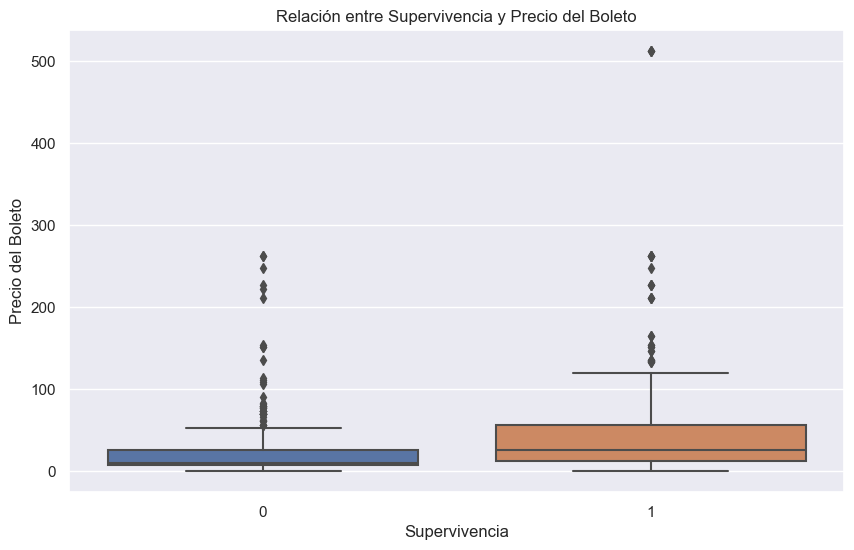

In [59]:
# Visualizar la relación entre la edad y el precio del boleto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=DatosExcel)
plt.title('Relación entre Edad y Precio del Boleto')
plt.xlabel('Edad')
plt.ylabel('Precio del Boleto')
plt.show()

# Visualizar la relación entre la clase del pasajero y el precio del boleto usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=DatosExcel)
plt.title('Relación entre Clase del Pasajero y Precio del Boleto')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Precio del Boleto')
plt.show()

# Visualizar la relación entre la supervivencia y el precio del boleto usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=DatosExcel)
plt.title('Relación entre Supervivencia y Precio del Boleto')
plt.xlabel('Supervivencia')
plt.ylabel('Precio del Boleto')
plt.show()


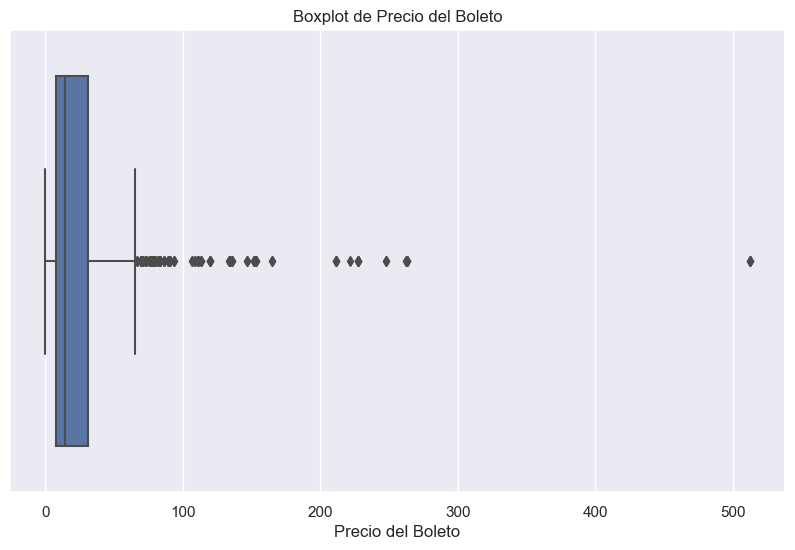

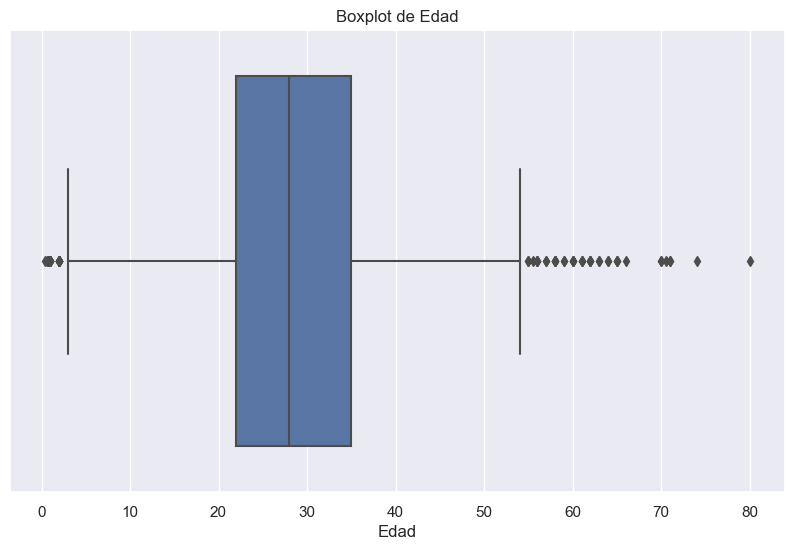

In [60]:
# Visualizar valores atípicos en el precio de venta usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DatosExcel['Fare'])
plt.title('Boxplot de Precio del Boleto')
plt.xlabel('Precio del Boleto')
plt.show()

# Visualizar valores atípicos en la edad usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DatosExcel['Age'])
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()


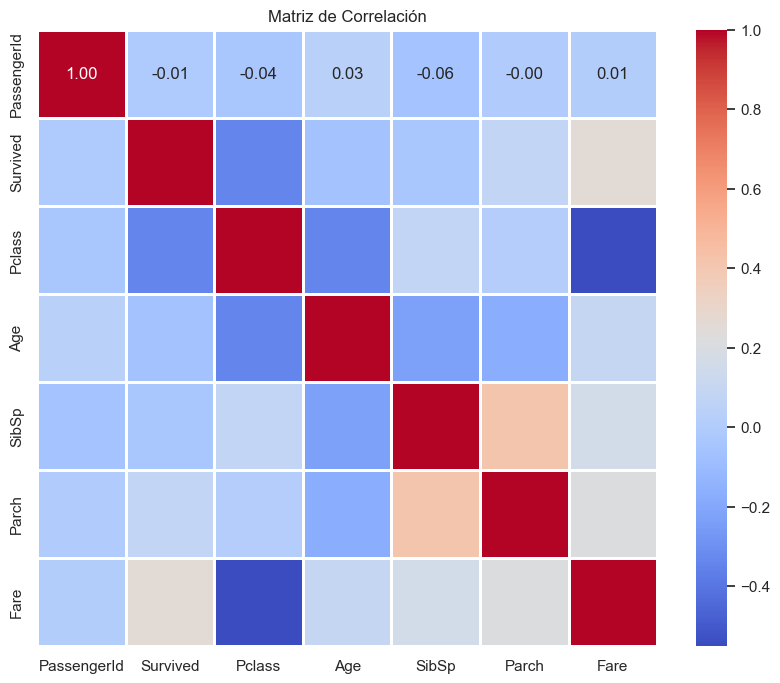

In [61]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
# Seleccionar columnas numéricas
numeric_cols = DatosExcel.select_dtypes(include=np.number)

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlación')
plt.show()



In [62]:
DatosExcel.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [63]:
# (4). Dividir datos en conjunto de entrenamiento y prueba
X = DatosExcel.drop('Survived', axis=1)
y = DatosExcel['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las características categóricas
categorical_features = ['Sex', 'Embarked']

# Crear un pipeline para preprocesamiento
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Combinar preprocesamiento con el modelo de regresión lineal
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrenar el modelo
model.fit(X_train, y_train)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = model.score(X_test, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.3162517459307913


In [64]:
# (5)Entrenar el modelo configurando los diferentes hiperparámetros
# Definir los parámetros que deseas ajustar
param_grid = {
    'regressor__fit_intercept': [True, False],
    # Otros hiperparámetros que deseas ajustar
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo con búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Predecir utilizando el modelo con los mejores hiperparámetros
y_pred = grid_search.predict(X_test)

# Evaluar el modelo con los mejores hiperparámetros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mejores hiperparámetros: {'regressor__fit_intercept': True}
Mean Squared Error: 0.16581017864978467
R-squared Score: 0.3162517459307913


In [65]:
DatosExcel.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [66]:
# (6) Entrenar el modelo configurando los diferentes hiperparámetros
# Calcular métricas de evaluación adicionales
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Absolute Error (MAE): 0.32922700494434903
Mean Squared Error (MSE): 0.16581017864978467
Root Mean Squared Error (RMSE): 0.40719796002655106
R-squared Score (R2): 0.3162517459307913


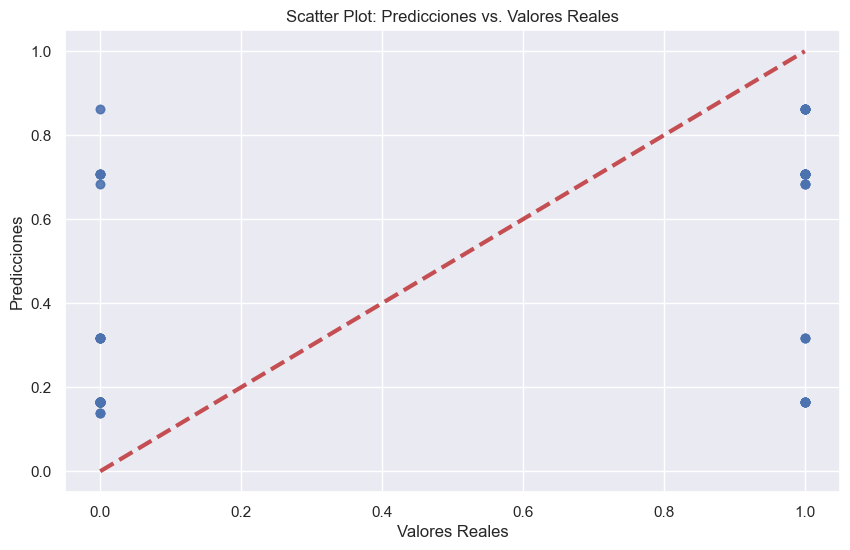

In [67]:
# (7) Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
# Scatter plot de predicciones vs. valores reales

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)  # Línea y = x
plt.title('Scatter Plot: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


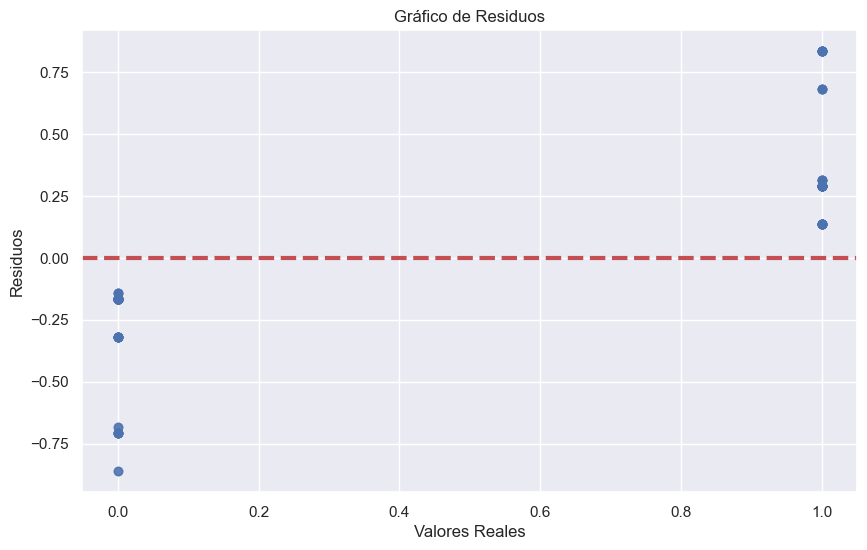

In [68]:
# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=3)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.show()


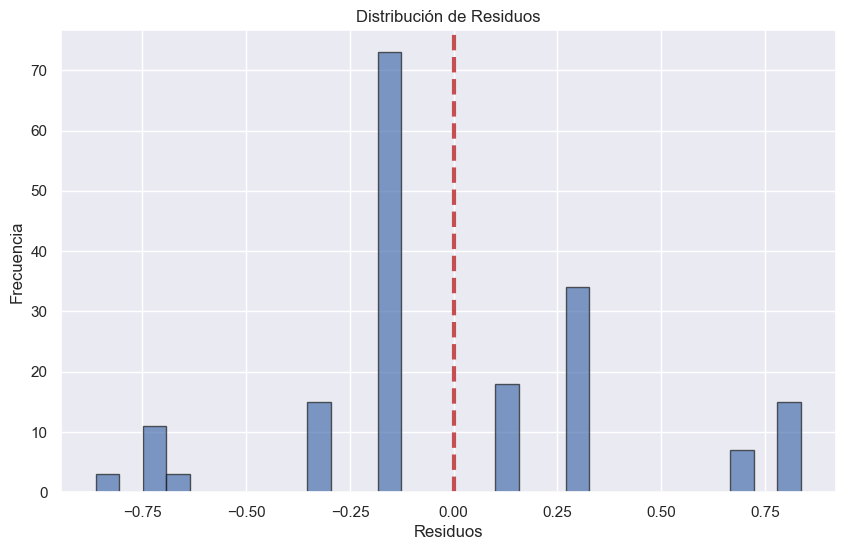

In [69]:
# Gráfico de distribución de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', lw=3)  # Línea vertical en x=0
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()
